In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
sns.set(color_codes = True)
sns.set_palette("muted")
from warnings import filterwarnings
filterwarnings("ignore")
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm

# Problem 1A

<b> Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

[Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]

In [2]:
df = pd.read_csv("SalaryData.csv")

In [3]:
df.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [5]:
df["Education"].unique()

array([' Doctorate', ' Bachelors', ' HS-grad'], dtype=object)

In [6]:
df["Occupation"].unique()

array([' Adm-clerical', ' Sales', ' Prof-specialty', ' Exec-managerial'],
      dtype=object)

<b> 1.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

<b>Null & Alternate Hypothesis based on Educational qualification
    
Ho: Mean Salary of individuals with different educational Qualification are equal

Ha: At least one Mean Salary of individuals with different educational Qualification are not equal

<b>Null & Alternate Hypothesis based on Occupation

Ho: Mean Salary of individuals with different occupations are equal

Ha: At least one  Mean Salary of individuals with different occupations are not equal

<b>1.2 Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [7]:
df["Education"]=pd.Categorical(df["Education"])

In [8]:
formula = 'Salary ~ C(Education)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


Here, we can notice that p value is less than Alpha.
Hence, we can reject the null hypothesis and conclude that, the Mean Salary of individuals with different educational Qualification are not equal

<b>1.3 Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [9]:
df["Occupation"]=pd.Categorical(df["Occupation"])

In [10]:
formula1 = 'Salary ~ C(Occupation)'
model1 = ols(formula1, df).fit()
aov_table1 = anova_lm(model1)
print(aov_table1)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


Here, we can notice that p value is greater than Alpha. Hence, we fail to reject the null hypothesis and conclude that, the Mean Salary of individuals with different Occupation are equal.

<b>1.5 What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]

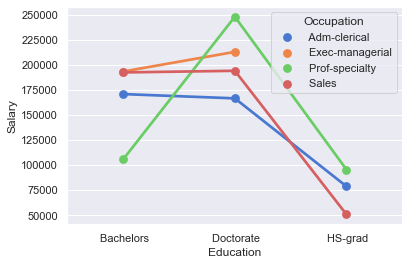

In [11]:
sns.pointplot(x='Education', y='Salary', hue ='Occupation' ,data=df,ci=None);

<b>1.6 Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?

In [12]:
formula2 = 'Salary ~ C(Education)+C(Occupation)+C(Education):C(Occupation)'
model2 = ols(formula2, df).fit()
aov_table2 = anova_lm(model2)
print(aov_table2)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


# Problem 2

<b>The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

In [13]:
df1 = pd.read_csv("Education-Post12thStandard.csv")

## Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

In [14]:
df1.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [15]:
df1.shape

(777, 18)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [17]:
df1.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

In [18]:
dups = df1.duplicated()
print(dups.value_counts())
df1[dups]

False    777
dtype: int64


Empty DataFrame
Columns: [Names, Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad, P.Undergrad, Outstate, Room.Board, Books, Personal, PhD, Terminal, S.F.Ratio, perc.alumni, Expend, Grad.Rate]
Index: []

In [19]:
df1in = df1.columns
df1in[:]

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [20]:
a=np.arange(0,17)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

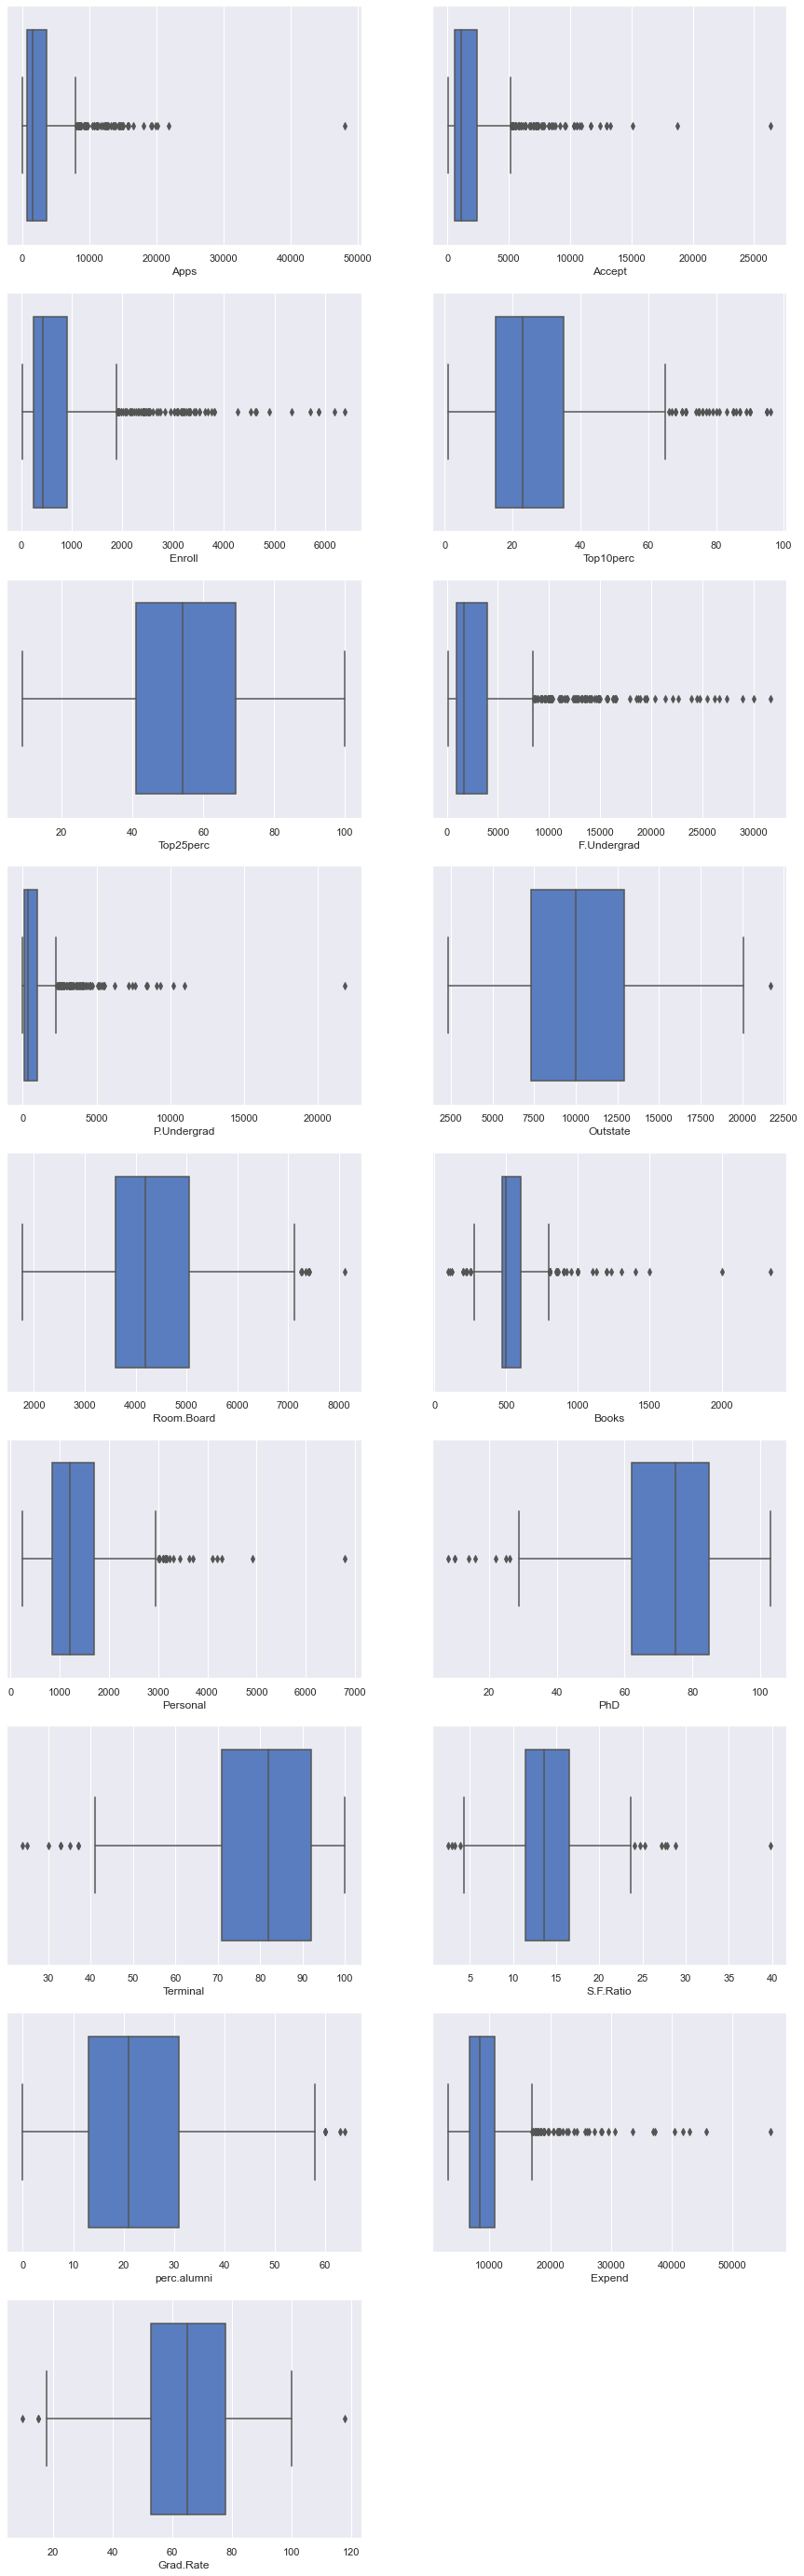

In [21]:
plt.figure(figsize=(15,50))
for i in a:
    plt.subplot(9,2,i+1);
    sns.boxplot(df1[df1in[i+1]]);

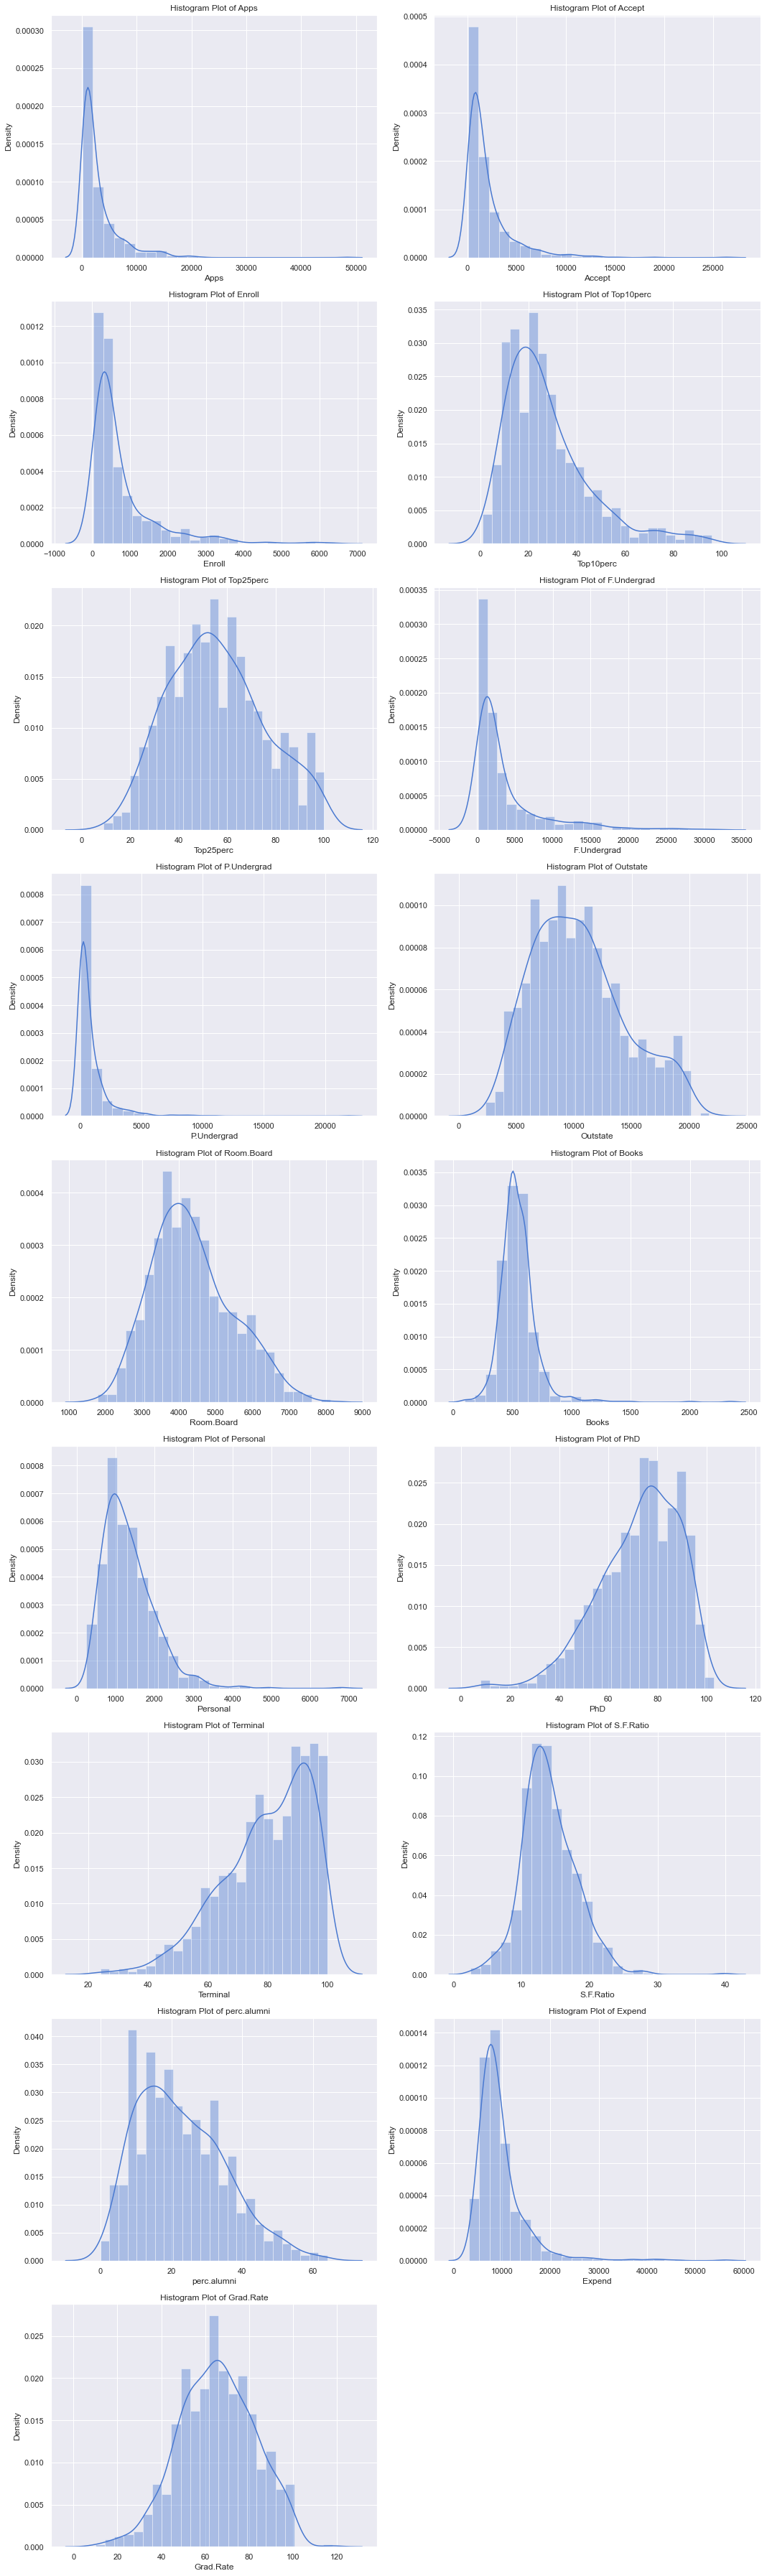

In [22]:
plt.figure(figsize=(15,50))
for i in a:
    plt.subplot(9,2,i+1);
    sns.distplot(df1[df1in[i+1]],bins=25);
    plt.title("Histogram Plot of {}".format(df1in[i+1]))
    plt.tight_layout();

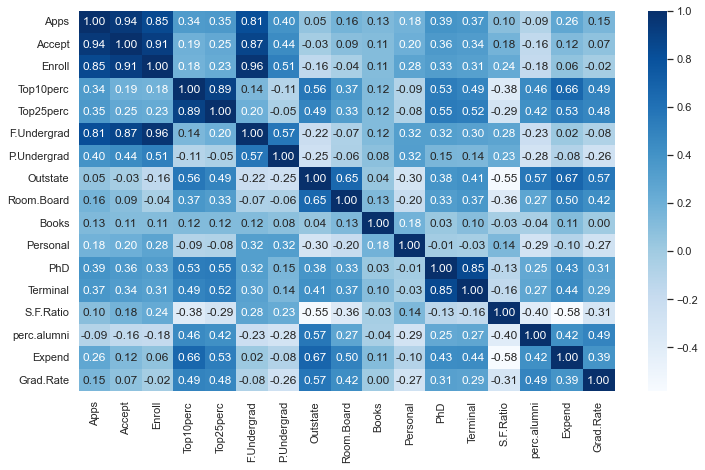

In [23]:
plt.figure(figsize=(12,7));
sns.heatmap(df1.corr(), annot=True, fmt='.2f', cmap='Blues');
plt.show();

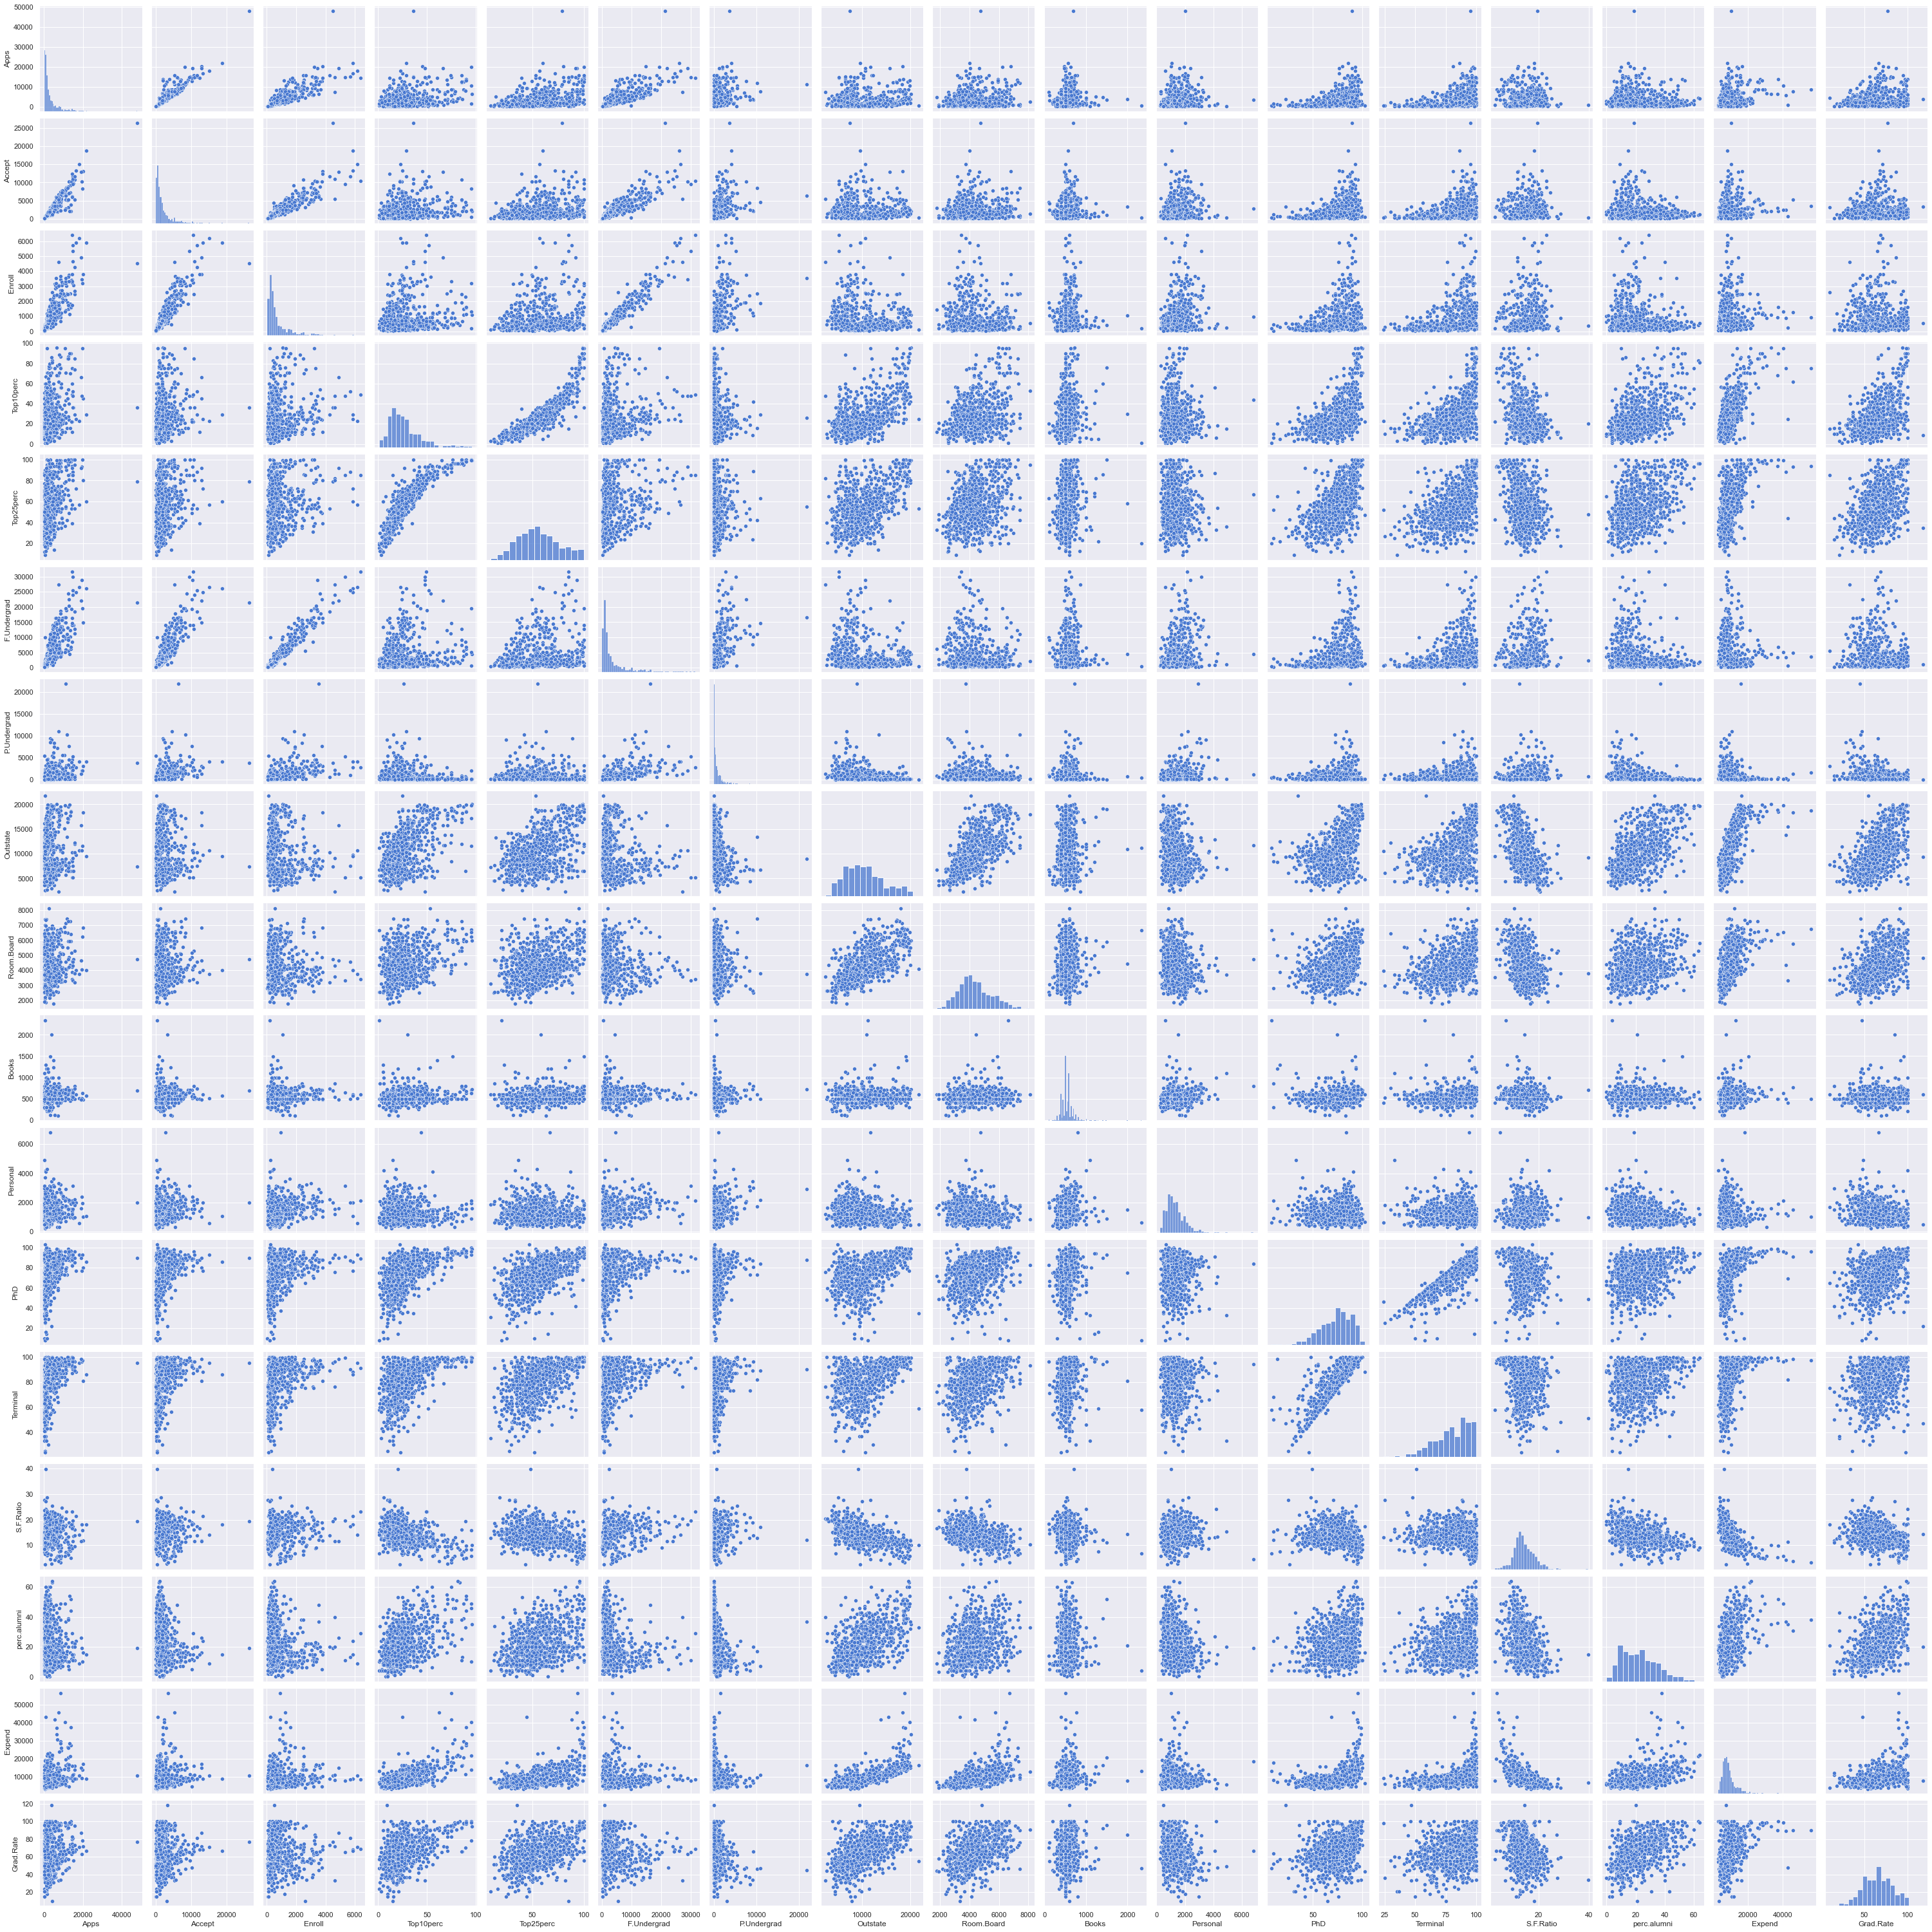

In [24]:
sns.pairplot(df1);

## Is scaling necessary for PCA in this case? Give justification and perform scaling.

In [25]:
df_pca = df1.drop(['Names'], axis = 1)
df_pca.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend  Grad.Rate  
0           12    7041         60  
1           16   10527         56  
2           30    8735         54  
3           37   19016         59  
4            2   10922         15

In [26]:
from scipy.stats import zscore
df_pca_scaled = df_pca.apply(zscore)

In [27]:
round(df_pca_scaled.head(),2)

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0 -0.35   -0.32   -0.06      -0.26      -0.19        -0.17        -0.21   
1 -0.21   -0.04   -0.29      -0.66      -1.35        -0.21         0.24   
2 -0.41   -0.38   -0.48      -0.32      -0.29        -0.55        -0.50   
3 -0.67   -0.68   -0.69       1.84       1.68        -0.66        -0.52   
4 -0.73   -0.76   -0.78      -0.66      -0.60        -0.71         0.01   

   Outstate  Room.Board  Books  Personal   PhD  Terminal  S.F.Ratio  \
0     -0.75       -0.96  -0.60      1.27 -0.16     -0.12       1.01   
1      0.46        1.91   1.22      0.24 -2.68     -3.38      -0.48   
2      0.20       -0.55  -0.91     -0.26 -1.20     -0.93      -0.30   
3      0.63        1.00  -0.60     -0.69  1.19      1.18      -1.62   
4     -0.72       -0.22   1.52      0.24  0.20     -0.52      -0.55   

   perc.alumni  Expend  Grad.Rate  
0        -0.87   -0.50      -0.32  
1        -0.54    0.17      -0.55  
2         0.59   -0.18      -0.67  
3         1.15    1.79      -0.38  
4        -1.68    0.24      -2.94

## Comment on the comparison between the covariance and the correlation matrices from this data.[on scaled data]

In [50]:
df_pca_scaled.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

In [53]:
df_pca_scaled.cov()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.001289  0.944666  0.847913   0.339270   0.352093     0.815540   
Accept       0.944666  1.001289  0.912811   0.192695   0.247795     0.875350   
Enroll       0.847913  0.912811  1.001289   0.181527   0.227037     0.965883   
Top10perc    0.339270  0.192695  0.181527   1.001289   0.893144     0.141471   
Top25perc    0.352093  0.247795  0.227037   0.893144   1.001289     0.199702   
F.Undergrad  0.815540  0.875350  0.965883   0.141471   0.199702     1.001289   
P.Undergrad  0.398777  0.441839  0.513730  -0.105492  -0.053646     0.571247   
Outstate     0.050224 -0.025788 -0.155678   0.563055   0.490024    -0.216020   
Room.Board   0.165152  0.091016 -0.040284   0.371959   0.331917    -0.068979   
Books        0.132729  0.113672  0.112856   0.119012   0.115676     0.115699   
Personal     0.178961  0.201248  0.281291  -0.093437  -0.080914     0.317608   
PhD          0.391201  0.356216  0.331896   0.532513   0.546566     0.318747   
Terminal     0.369968  0.338018  0.308671   0.491768   0.525425     0.300406   
S.F.Ratio    0.095756  0.176456  0.237577  -0.385370  -0.295009     0.280064   
perc.alumni -0.090342 -0.160196 -0.181027   0.456072   0.418403    -0.229758   
Expend       0.259927  0.124878  0.064252   0.661765   0.528127     0.018676   
Grad.Rate    0.146944  0.067399 -0.022370   0.495627   0.477896    -0.078875   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398777  0.050224    0.165152  0.132729  0.178961  0.391201   
Accept          0.441839 -0.025788    0.091016  0.113672  0.201248  0.356216   
Enroll          0.513730 -0.155678   -0.040284  0.112856  0.281291  0.331896   
Top10perc      -0.105492  0.563055    0.371959  0.119012 -0.093437  0.532513   
Top25perc      -0.053646  0.490024    0.331917  0.115676 -0.080914  0.546566   
F.Undergrad     0.571247 -0.216020   -0.068979  0.115699  0.317608  0.318747   
P.Undergrad     1.001289 -0.253839   -0.061405  0.081304  0.320294  0.149306   
Outstate       -0.253839  1.001289    0.655100  0.038905 -0.299472  0.383476   
Room.Board     -0.061405  0.655100    1.001289  0.128128 -0.199685  0.329627   
Books           0.081304  0.038905    0.128128  1.001289  0.179526  0.026940   
Personal        0.320294 -0.299472   -0.199685  0.179526  1.001289 -0.010950   
PhD             0.149306  0.383476    0.329627  0.026940 -0.010950  1.001289   
Terminal        0.142086  0.408509    0.375022  0.100084 -0.030653  0.850682   
S.F.Ratio       0.232830 -0.555536   -0.363095 -0.031970  0.136521 -0.130698   
perc.alumni    -0.281154  0.566992    0.272714 -0.040260 -0.286337  0.249330   
Expend         -0.083676  0.673646    0.502386  0.112554 -0.098018  0.433319   
Grad.Rate      -0.257332  0.572026    0.425489  0.001062 -0.269691  0.305431   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369968   0.095756    -0.090342  0.259927   0.146944  
Accept       0.338018   0.176456    -0.160196  0.124878   0.067399  
Enroll       0.308671   0.237577    -0.181027  0.064252  -0.022370  
Top10perc    0.491768  -0.385370     0.456072  0.661765   0.495627  
Top25perc    0.525425  -0.295009     0.418403  0.528127   0.477896  
F.Undergrad  0.300406   0.280064    -0.229758  0.018676  -0.078875  
P.Undergrad  0.142086   0.232830    -0.281154 -0.083676  -0.257332  
Outstate     0.408509  -0.555536     0.566992  0.673646   0.572026  
Room.Board   0.375022  -0.363095     0.272714  0.502386   0.425489  
Books        0.100084  -0.031970    -0.040260  0.112554   0.001062  
Personal    -0.030653   0.136521    -0.286337 -0.098018  -0.269691  
PhD          0.850682  -0.130698     0.249330  0.433319   0.305431  
Terminal     1.001289  -0.160310     0.267475  0.439365   0.289900  
S.F.Ratio   -0.160310   1.001289    -0.403448 -0.584584  -0.307106  
perc.alumni  0.267475  -0.403448     1.001289  0.418250   0.491530  
Expend       0.439365  -0.58458

## Check the dataset for outliers before and after scaling. What insight do you derive here? [Please do not treat Outliers unless specifically asked to do so]

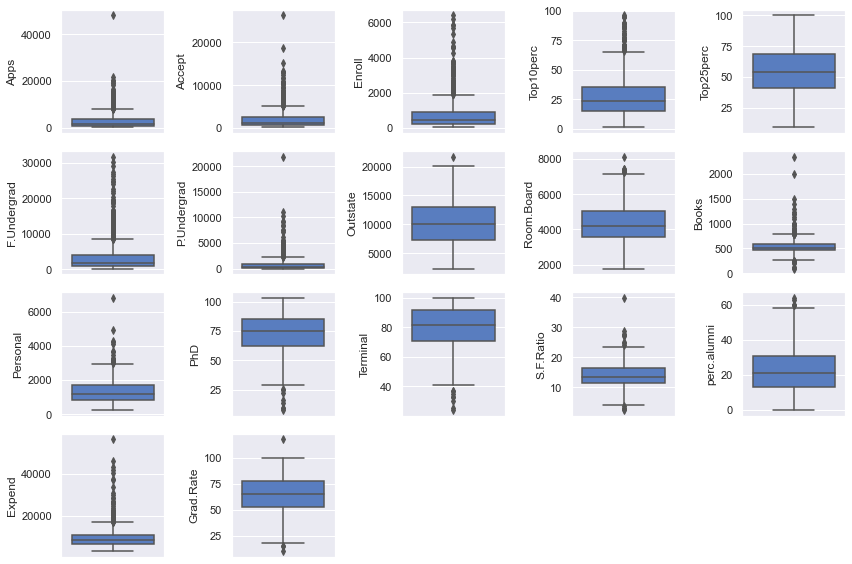

In [30]:
plt.figure(figsize=(12,8))
for i in a:
    plt.subplot(4,5,i+1);
    sns.boxplot(y=df1[df1in[i+1]]);
    plt.tight_layout()

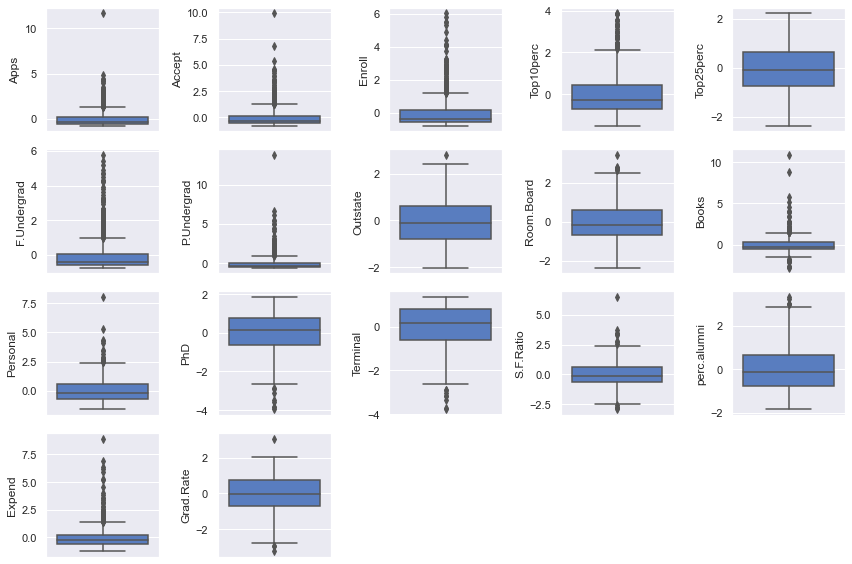

In [31]:
plt.figure(figsize=(12,8))
for i in a:
    plt.subplot(4,5,i+1);
    sns.boxplot(y=df_pca_scaled[df1in[i+1]]);
    plt.tight_layout()

In [32]:
round(df_pca_scaled.corr(),2)

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.00    0.94    0.85       0.34       0.35         0.81   
Accept       0.94    1.00    0.91       0.19       0.25         0.87   
Enroll       0.85    0.91    1.00       0.18       0.23         0.96   
Top10perc    0.34    0.19    0.18       1.00       0.89         0.14   
Top25perc    0.35    0.25    0.23       0.89       1.00         0.20   
F.Undergrad  0.81    0.87    0.96       0.14       0.20         1.00   
P.Undergrad  0.40    0.44    0.51      -0.11      -0.05         0.57   
Outstate     0.05   -0.03   -0.16       0.56       0.49        -0.22   
Room.Board   0.16    0.09   -0.04       0.37       0.33        -0.07   
Books        0.13    0.11    0.11       0.12       0.12         0.12   
Personal     0.18    0.20    0.28      -0.09      -0.08         0.32   
PhD          0.39    0.36    0.33       0.53       0.55         0.32   
Terminal     0.37    0.34    0.31       0.49       0.52         0.30   
S.F.Ratio    0.10    0.18    0.24      -0.38      -0.29         0.28   
perc.alumni -0.09   -0.16   -0.18       0.46       0.42        -0.23   
Expend       0.26    0.12    0.06       0.66       0.53         0.02   
Grad.Rate    0.15    0.07   -0.02       0.49       0.48        -0.08   

             P.Undergrad  Outstate  Room.Board  Books  Personal   PhD  \
Apps                0.40      0.05        0.16   0.13      0.18  0.39   
Accept              0.44     -0.03        0.09   0.11      0.20  0.36   
Enroll              0.51     -0.16       -0.04   0.11      0.28  0.33   
Top10perc          -0.11      0.56        0.37   0.12     -0.09  0.53   
Top25perc          -0.05      0.49        0.33   0.12     -0.08  0.55   
F.Undergrad         0.57     -0.22       -0.07   0.12      0.32  0.32   
P.Undergrad         1.00     -0.25       -0.06   0.08      0.32  0.15   
Outstate           -0.25      1.00        0.65   0.04     -0.30  0.38   
Room.Board         -0.06      0.65        1.00   0.13     -0.20  0.33   
Books               0.08      0.04        0.13   1.00      0.18  0.03   
Personal            0.32     -0.30       -0.20   0.18      1.00 -0.01   
PhD                 0.15      0.38        0.33   0.03     -0.01  1.00   
Terminal            0.14      0.41        0.37   0.10     -0.03  0.85   
S.F.Ratio           0.23     -0.55       -0.36  -0.03      0.14 -0.13   
perc.alumni        -0.28      0.57        0.27  -0.04     -0.29  0.25   
Expend             -0.08      0.67        0.50   0.11     -0.10  0.43   
Grad.Rate          -0.26      0.57        0.42   0.00     -0.27  0.31   

             Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Apps             0.37       0.10        -0.09    0.26       0.15  
Accept           0.34       0.18        -0.16    0.12       0.07  
Enroll           0.31       0.24        -0.18    0.06      -0.02  
Top10perc        0.49      -0.38         0.46    0.66       0.49  
Top25perc        0.52      -0.29         0.42    0.53       0.48  
F.Undergrad      0.30       0.28        -0.23    0.02      -0.08  
P.Undergrad      0.14       0.23        -0.28   -0.08      -0.26  
Outstate         0.41      -0.55         0.57    0.67       0.57  
Room.Board       0.37      -0.36         0.27    0.50       0.42  
Books            0.10      -0.03        -0.04    0.11       0.00  
Personal        -0.03       0.14        -0.29   -0.10      -0.27  
PhD              0.85      -0.13         0.25    0.43       0.31  
Terminal         1.00      -0.16         0.27    0.44       0.29  
S.F.Ratio       -0.16       1.00        -0.40   -0.58      -0.31  
perc.alumni      0.27      -0.40         1.00    0.42       0.49  
Expend           0.44      -0.58         0.42    1.00       0.39  
Grad.Rate        0.29      -0.31         0.49    0.39       1.00

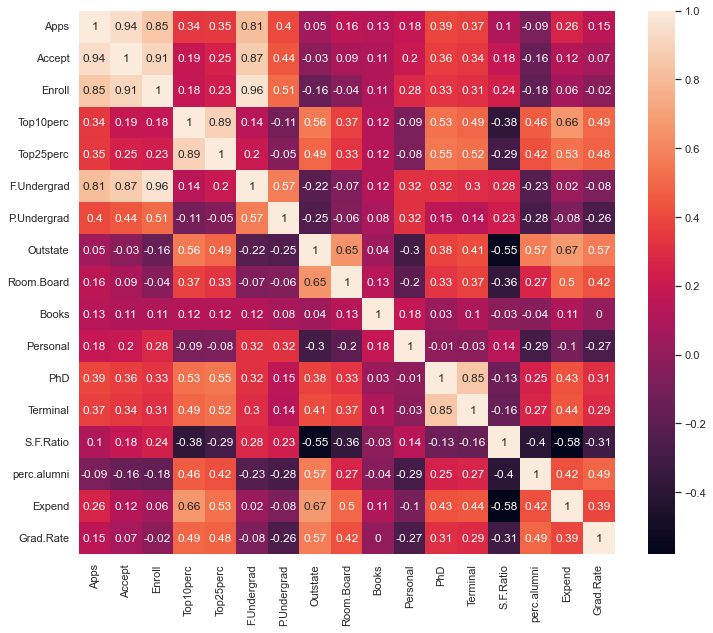

In [33]:
plt.figure(figsize = (12,10))
sns.heatmap(round(df_pca_scaled.corr(),2), annot=True);

In [34]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_pca_scaled)
p_value

0.0

In [35]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_pca_scaled)
kmo_model

0.8131251200373532

## Extract the eigenvalues and eigen vectors. [Using Sklearn PCA Print Both]

In [36]:
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=17, random_state=123)
pca_transformed = pca.fit_transform(df_pca_scaled)

In [37]:
#Eigen vectors
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [38]:
#Eigen values
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [39]:
#Explained variance for each PC
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234, 0.02375192,
       0.01841426, 0.01296041, 0.00985754, 0.00845842, 0.00517126,
       0.00215754, 0.00135284])

In [40]:
len(pca.explained_variance_ratio_)

17

In [41]:
#dataframe containing the coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12','PC13','PC14','PC15','PC16','PC17'],
                                    index = df_pca_scaled.columns)
round(df_extracted_loadings,4)

PC1     PC2     PC3     PC4     PC5     PC6     PC7     PC8  \
Apps         0.2488  0.3316 -0.0631  0.2813  0.0057 -0.0162 -0.0425 -0.1031   
Accept       0.2076  0.3721 -0.1012  0.2678  0.0558  0.0075 -0.0129 -0.0563   
Enroll       0.1763  0.4037 -0.0830  0.1618 -0.0557 -0.0426 -0.0277  0.0587   
Top10perc    0.3543 -0.0824  0.0351 -0.0515 -0.3954 -0.0527 -0.1613 -0.1227   
Top25perc    0.3440 -0.0448 -0.0241 -0.1098 -0.4265  0.0331 -0.1185 -0.1025   
F.Undergrad  0.1546  0.4177 -0.0614  0.1004 -0.0435 -0.0435 -0.0251  0.0789   
P.Undergrad  0.0264  0.3151  0.1397 -0.1586  0.3024 -0.1912  0.0610  0.5708   
Outstate     0.2947 -0.2496  0.0466  0.1313  0.2225 -0.0300  0.1085  0.0098   
Room.Board   0.2490 -0.1378  0.1490  0.1850  0.5609  0.1628  0.2097 -0.2215   
Books        0.0648  0.0563  0.6774  0.0871 -0.1273  0.6411 -0.1497  0.2133   
Personal    -0.0425  0.2199  0.4997 -0.2307 -0.2223 -0.3314  0.6338 -0.2327   
PhD          0.3183  0.0583 -0.1270 -0.5347  0.1402  0.0913 -0.0011 -0.0770   
Terminal     0.3171  0.0464 -0.0660 -0.5194  0.2047  0.1549 -0.0285 -0.0122   
S.F.Ratio   -0.1770  0.2467 -0.2898 -0.1612 -0.0794  0.4870  0.2193 -0.0836   
perc.alumni  0.2051 -0.2466 -0.1470  0.0173 -0.2163 -0.0473  0.2433  0.6785   
Expend       0.3189 -0.1317  0.2267  0.0793  0.0760 -0.2981 -0.2266 -0.0542   
Grad.Rate    0.2523 -0.1692 -0.2081  0.2691 -0.1093  0.2162  0.5599 -0.0053   

                PC9    PC10    PC11    PC12    PC13    PC14    PC15    PC16  \
Apps        -0.0902  0.0525  0.0430  0.0241  0.5958  0.0806  0.1334  0.4591   
Accept      -0.1779  0.0411 -0.0584 -0.1451  0.2926  0.0335 -0.1455 -0.5186   
Enroll      -0.1286  0.0345 -0.0694  0.0111 -0.4446 -0.0857  0.0296 -0.4043   
Top10perc    0.3411  0.0640 -0.0081  0.0386  0.0010 -0.1078  0.6977 -0.1487   
Top25perc    0.4037  0.0145 -0.2731 -0.0894  0.0219  0.1517 -0.6173  0.0519   
F.Undergrad -0.0594  0.0208 -0.0812  0.0562 -0.5236 -0.0564  0.0099  0.5604   
P.Undergrad  0.5607 -0.2231  0.1007 -0.0635  0.1260  0.0193  0.0210 -0.0527   
Outstate    -0.0046  0.1867  0.1432 -0.8234 -0.1419 -0.0340  0.0384  0.1016   
Room.Board   0.2750  0.2983 -0.3593  0.3546 -0.0697 -0.0584  0.0034 -0.0259   
Books       -0.1337 -0.0820  0.0319 -0.0282  0.0114 -0.0668 -0.0094  0.0029   
Personal    -0.0945  0.1360 -0.0186 -0.0393  0.0395  0.0275 -0.0031 -0.0129   
PhD         -0.1852 -0.1235  0.0404  0.0232  0.1277 -0.6911 -0.1121  0.0298   
Terminal    -0.2549 -0.0886 -0.0590  0.0165 -0.0583  0.6710  0.1589 -0.0271   
S.F.Ratio    0.2745  0.4720  0.4450 -0.0110 -0.0177  0.0414 -0.0209 -0.0212   
perc.alumni -0.2553  0.4230 -0.1307  0.1827  0.1041 -0.0272 -0.0084  0.0033   
Expend      -0.0491  0.1323  0.6921  0.3260 -0.0937  0.0731 -0.2277 -0.0439   
Grad.Rate    0.0419 -0.5903  0.2198  0.1221 -0.0692  0.0365 -0.0034 -0.0050   

               PC17  
Apps         0.3590  
Accept      -0.5434  
Enroll       0.6097  
Top10perc   -0.1450  
Top25perc    0.0803  
F.Undergrad -0.4147  
P.Undergrad  0.0090  
Outstate     0.0509  
Room.Board   0.0011  
Books        0.0008  
Personal    -0.0011  
PhD          0.0138  
Terminal     0.0062  
S.F.Ratio   -0.0022  
perc.alumni -0.0192  
Expend      -0.0353  
Grad.Rate   -0.0131

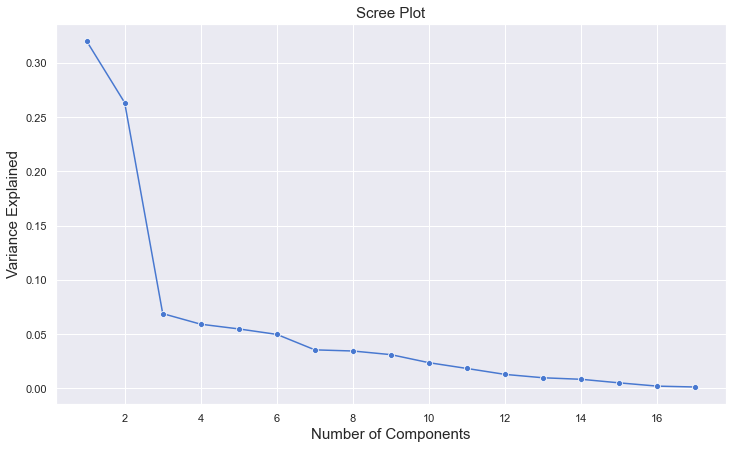

In [42]:
plt.figure(figsize=(12,7));
ax = sns.lineplot(y=pca.explained_variance_ratio_,x=range(1,len(pca.explained_variance_ratio_)+1),marker='o');
plt.xlabel('Number of Components',fontsize=15);
plt.ylabel('Variance Explained',fontsize=15);
plt.title('Scree Plot',fontsize=15);

In [43]:
np.round(np.cumsum(pca.explained_variance_ratio_),3)

array([0.32 , 0.584, 0.653, 0.712, 0.767, 0.817, 0.852, 0.887, 0.918,
       0.942, 0.96 , 0.973, 0.983, 0.991, 0.996, 0.999, 1.   ])

In [44]:
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6','PC7']]

In [45]:
df_selected

PC1       PC2       PC3       PC4       PC5       PC6  \
Apps         0.248766  0.331598 -0.063092  0.281311  0.005741 -0.016237   
Accept       0.207602  0.372117 -0.101249  0.267817  0.055786  0.007535   
Enroll       0.176304  0.403724 -0.082986  0.161827 -0.055694 -0.042558   
Top10perc    0.354274 -0.082412  0.035056 -0.051547 -0.395434 -0.052693   
Top25perc    0.344001 -0.044779 -0.024148 -0.109767 -0.426534  0.033092   
F.Undergrad  0.154641  0.417674 -0.061393  0.100412 -0.043454 -0.043454   
P.Undergrad  0.026443  0.315088  0.139682 -0.158558  0.302385 -0.191199   
Outstate     0.294736 -0.249644  0.046599  0.131291  0.222532 -0.030000   
Room.Board   0.249030 -0.137809  0.148967  0.184996  0.560919  0.162755   
Books        0.064758  0.056342  0.677412  0.087089 -0.127289  0.641055   
Personal    -0.042529  0.219929  0.499721 -0.230711 -0.222311 -0.331398   
PhD          0.318313  0.058311 -0.127028 -0.534725  0.140166  0.091256   
Terminal     0.317056  0.046429 -0.066038 -0.519443  0.204720  0.154928   
S.F.Ratio   -0.176958  0.246665 -0.289848 -0.161189 -0.079388  0.487046   
perc.alumni  0.205082 -0.246595 -0.146989  0.017314 -0.216297 -0.047340   
Expend       0.318909 -0.131690  0.226744  0.079273  0.075958 -0.298119   
Grad.Rate    0.252316 -0.169241 -0.208065  0.269129 -0.109268  0.216163   

                  PC7  
Apps        -0.042486  
Accept      -0.012950  
Enroll      -0.027693  
Top10perc   -0.161332  
Top25perc   -0.118486  
F.Undergrad -0.025076  
P.Undergrad  0.061042  
Outstate     0.108529  
Room.Board   0.209744  
Books       -0.149692  
Personal     0.633790  
PhD         -0.001096  
Terminal    -0.028477  
S.F.Ratio    0.219259  
perc.alumni  0.243321  
Expend      -0.226584  
Grad.Rate    0.559944

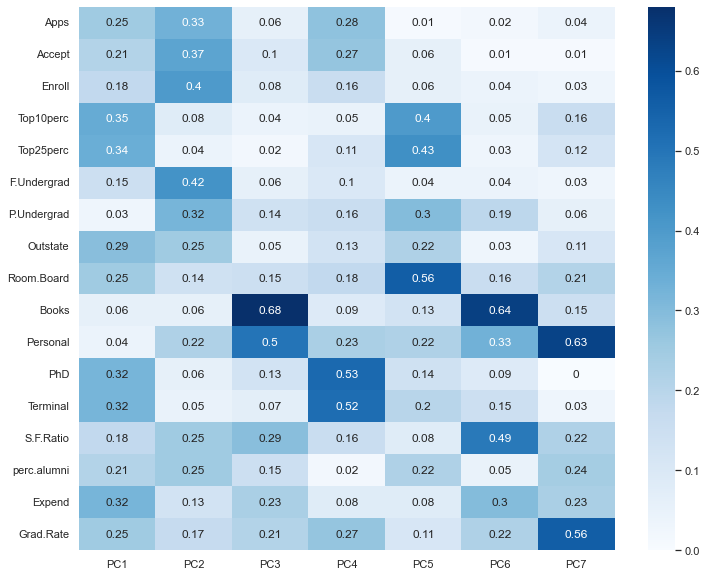

In [46]:
plt.figure(figsize = (12,10))
sns.heatmap(abs(round(df_selected,2)),cmap="Blues", annot=True);

In [47]:
pca = PCA(n_components=7, random_state=123)
pca_final = pca.fit_transform(df_pca_scaled)

In [48]:
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

PC1       PC2       PC3       PC4       PC5       PC6       PC7
0 -1.592855  0.767334 -0.101074 -0.921749 -0.743975 -0.298306  0.638443
1 -2.192402 -0.578830  2.278798  3.588918  1.059997 -0.177137  0.236753
2 -1.430964 -1.092819 -0.438093  0.677241 -0.369613 -0.960592 -0.248276
3  2.855557 -2.630612  0.141722 -1.295486 -0.183837 -1.059508 -1.249356
4 -2.212008  0.021631  2.387030 -1.114538  0.684451  0.004918 -2.159220
5 -0.571665 -1.496325  0.024354  0.066944 -0.376261 -0.668344 -1.609835
6  0.241952 -1.506368  0.234194 -1.142024  1.546983 -0.009995  0.590933
7  1.750474 -1.461412 -1.026589 -0.981184  0.217044  0.222924  0.038169
8  0.769127 -1.984433 -1.426052 -0.071424  0.586380 -0.655179 -0.213314
9 -2.770721 -0.844611  1.627987  1.705091 -1.019826 -0.794401 -0.317891

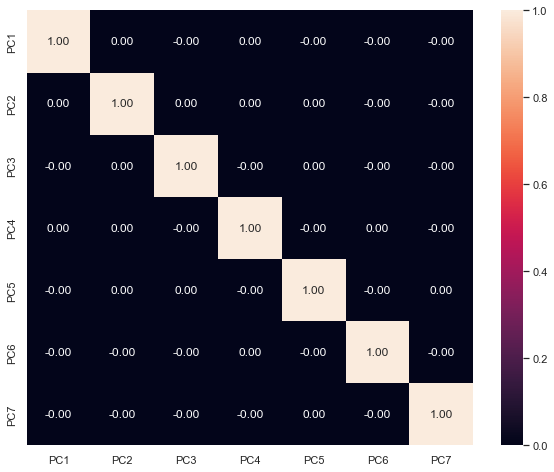

In [49]:
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');

<b> End